# AULA 8: O VSSS

Nessa aula iremos aprender como implementar os conhecimentos transmitidos no curso, para o vsss (Very Small size Soccer).Primeiro vamos enteder como funciona a competição e seus elementos.

## 8.1 - Um pouco sobre o vsss


A Very Small Size soccer (VSSS) tem como objetivo desenvolver um time constituído de três robôs de até 7,5×7,5×7,5 cm de tamanho. Esse time deve ser capaz de jogar futebol de forma autônoma, através do desenvolvimento de tecnologias nas áreas de inteligência artificial, reconhecimento de imagem, eletrônica e mecânica. O foco da competição da VSSS está na cooperação e no controle multi-agente inteligente em um ambiente altamente dinâmico com um sistema híbrido (centralizado/distribuído) e no reconhecimento dos robôs pela visão. Ou seja, é necessário fazer com que os robôs joguem coletivamente ao realizar passes e jogadas.

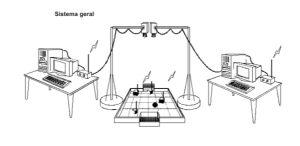

In [1]:
from IPython.display import Image
Image(filename='Foto-VSS-2.png')



A visão é formada por uma câmera para cada time, cada um com o seu próprio sistema de visão para rastrear todos os objetos no campo. Cada equipe possui o seu computador que recebe os comandos do juiz e as informações de posição dos robôs via Ethernet. Os computadores fazem todo o processamento necessário para a coordenação e controle dos robôs sendo a comunicação com os robôs feita via wireless.

 

## 8.2 - Funções de reconhecimento no vsss

Nessa aula iremos focar no reconhecimento do campo e da bolinha no campo, e como mostrar esses valores.

Primeiramente iremos ver como encontrar o campo atraves das funções ensinadas:

O primeiro passo para identificar o campo é abrir uma captura de imagem em tons de hsv,com a função cv2.cvtColor, após isso temos que definir qual processo utilizaremos para definir o campo. Uma das formas mais viáveis de fazer isso, é com a função inRange.

## 8.3 - cv2.cvtColor( variavelimagem, conversão)

parâmetros : **variavelimagem** :é onde colocamos a imagem, vídeo ou captura de imagem;  
             **conversão** :é onde colocamos o parâmetro que vai transformar de BGR para HSV(hue (matiz),      saturation (saturação) e value (valor).), no nosso caso iremos usar o cv2.COLOR_BGR2HSV

Agora, com a função inRange iremos criar uma máscara que vai, filtrar e mostrar apenas os valores de cores delimitados por um intervalo que vamos definir.

## 8.4 - cv2.inRange(variavelimagem, pontomin, pontomax)


Antes de mostrarmos os parâmetros dessa função, iremos ter que definir dois vetores multidimensionais utilizando a função np.array([hue,saturation,value]),criaremos um vetor para a intensidade máxima do objeto( campo) outro pra a intensidade mínima. Tendo isso em mente podemos mostrar os pârametros do inRange.

Parâmetros : **variavelimagem** :é onde colocamos a imagem, vídeo ou captura de imagem;
             **pontomin** : é aquele vetor que contém a intensidade mínima da cor que 
             estamos procurando;
             **pontomax** : é o vetor que contém a intensidade máxima da cor que 
             estamos procurando.
             
Dito isso, para acharmos a borda do campo, temos que ver qual o intervalo de HSV se encontra esse branco, que podemos verificar na janela do opencv. Para encontrar a bolinha é da mesma forma, só que mudaremos o intervalo do HSV.

## 8.5 - cv2.findContours(mascara, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


Ja sabemos como encontrar a bolinha, porém agora precisamos marca-la de alguma forma no campo, no nosso caso iremos usar um retângulo, mas para marcarmos a bolinha temos que determinar seus contornos com a função cv2.findContours.

Parâmetros: **mascara**: máscara criada com o inRange;
            **cv2.RETR_TREE**: constrói uma hierarquia entre os contornos e concatena-os como uma pirâmide;
            **cv2.CHAIN_APPROX_SIMPLE**: essa função comprime os segmentos verticais,horizontais e diagonais , deixando apenas seus pontos finais, como por exemplo num retângulo é deixado 4 pontos.

## 8.6 - cv2.contourArea(contorno)

A partir dos contornos achados iremos delimitar a área de cada possível contorno, aplicando a funçâo cv2.contourArea para cada contorno achado, fomando junto com outros comandos um vetor que armazena os contornos. A linha de código fica: 

In [ ]:
tamanho_contorno = [(cv2.contourArea(contorno), contorno) for contorno in contornos]

Perceba que é criado um vetor para cada contorno dentro dos contornos determinados .

## 8.7 - max(tamanho_contorno, key=lambda x: x[0])[1] 

agora iremos determinar o alcance máximo para podermos delimitar a bolinha. Através da função, do próprio python ,Max() , que cria uma função em linha e retorna o maior valor daquele vetor que criamos no tópico passado, através da função key=lambda x: x[0].

## 8.8 - criando o retângulo

Primeiramente, iremos atribuir as dimensões do nosso retângulo, declarando as variáveis de acordo com a função cv2.boundingRect(contorno_maior), que cria as variáveis. Após isso tudo, iremos contruir o retângulo,  como aprendemos na aula 02, mas como parâmetros, usaremos as variávei encontradas na função anterior. As linhas de construção do retângulo ficam:

In [ ]:
        x, y, w, h = cv2.boundingRect(biggest_contour)
        frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)

## 8.9 - Aplicando o curso

Agora, com tudo que foi ensinado ao longo do curso, crie um programa que delimite o tamanho do campo e encontre a bolinha, marcando-a com um retângulo. utlize o video em anexo para isso. 